- In this project we tend to analyise what kind of profession is required for the students in the future. 
- As per a research, there are people who do not have a clear perspective of what they want to do in the future and what is their carrer path. 
- We plan to analyse the data from the job market before and post pandemic and to help students get a better understand of what kind of proffesion they can pursue and what skill are required for them excel in that profession.


For instance as per these research, 
# Career Aspirations of Students Aged 18 or Below

Understanding how many young individuals know what they want to do when they grow up varies across surveys and studies. Here are some key findings:

## Key Statistics

- **Junior Achievement and EY Survey (2017)**:  
  This survey of 1,000 teenagers aged 13 to 17 found that **91% believed they knew the career they wanted to pursue**.  
  [Source: Payscale](https://www.payscale.com/career-advice/teenager-career-choice-91-percent-teens-think-know-career-want/?utm_source=chatgpt.com)

- **ECMC Group Study (2022)**:  
  In a study involving high school students:
  - **75% reported having a specific career in mind.**
  - **74% felt it was important to have their career plans determined by the time they graduated high school.**  
  [Source: The Journal](https://thejournal.com/articles/2022/05/19/national-study-high-schoolers-eyeing-career-and-workforce-landscape-when-deciding-their-futures.aspx?utm_source=chatgpt.com)

- **OECD PISA 2022 Findings**:  
  The Programme for International Student Assessment (PISA) 2022 reported:
  - **Two in five 15-year-old students across OECD countries lacked clear career plans.**  
  [Source: OECD iLibrary](https://www.oecd-ilibrary.org/education/teenage-career-uncertainty_e89c3da9-en?utm_source=chatgpt.com)

## Summary
While a significant majority of teenagers express confidence in their career aspirations, a substantial portion remain uncertain. These findings underscore the importance of career guidance and exploration programs to help young individuals make informed decisions about their futures.


With our project we plan on creating a 360 degree view of the job market and the skills required for the students to excel in that profession along with the education that is required and the trend of the education and the job market till 2033. 

In [ ]:
import streamlit

In [72]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt

In [73]:
from education_DataSet_cleaning_extraction import load_table_to_dataframe

In [74]:

file_path = "2019-29/education.xlsx"
file_path2 = "2023-33/education.xlsx"
file_path3 = "2019-29/occupation.xlsx"
education_52_1929 = load_table_to_dataframe(file_path, "Table 5.2", header_row=1,num_rows=9)
education_53_1929 = load_table_to_dataframe(file_path, "Table 5.3", header_row=1,num_rows=791)
education_54_1929 = load_table_to_dataframe(file_path,"Table 5.4",header_row=1,num_rows=790)
education_51_2333 = load_table_to_dataframe(file_path2, "Table 5.1", header_row=1,num_rows=8)
education_52_2333 = load_table_to_dataframe(file_path2, "Table 5.2", header_row=1,num_rows=9)
education_53_2333 = load_table_to_dataframe(file_path2, "Table 5.3", header_row=1,num_rows=833)
education_54_2333 = load_table_to_dataframe(file_path2,"Table 5.4",header_row=1,num_rows=832)
occupation_11_1929 = load_table_to_dataframe(file_path3, "Table 1.1", header_row=1,num_rows=23)
##new comment by Lisa new branch

In [75]:
occupation_11_1929['lables'] = occupation_11_1929['2019 National Employment Matrix code'].str.split('-').str[0]

In [76]:
# Create a dictionary from the two columns
title_labels_dict = occupation_11_1929.set_index('lables')['2019 National Employment Matrix title'].to_dict()
# Check the dictionary
education_53_1929['lables'] = education_53_1929['2019 National Employment Matrix code'].str.split('-').str[0]
education_53_1929['Title Labels'] = education_53_1929['lables'].map(title_labels_dict)

education_53_2333['lables'] = education_54_2333['2023 National Employment Matrix code'].str.split('-').str[0]
education_53_2333['Title Labels'] = education_53_2333['lables'].map(title_labels_dict)

education_54_1929['lables'] = education_54_1929['2019 National Employment Matrix code'].str.split('-').str[0]
education_54_1929['Title Labels'] = education_54_1929['lables'].map(title_labels_dict)

education_54_2333['lables'] = education_54_2333['2023 National Employment Matrix code'].str.split('-').str[0]
education_54_2333['Title Labels'] = education_54_2333['lables'].map(title_labels_dict)

In [77]:
education_54_2333

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link,lables,Title Labels
0,Chief executives,11-1011,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN,—,11,Management occupations
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,NaN,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training,OOH Content,53,Transportation and material moving occupations
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training,—,53,Transportation and material moving occupations


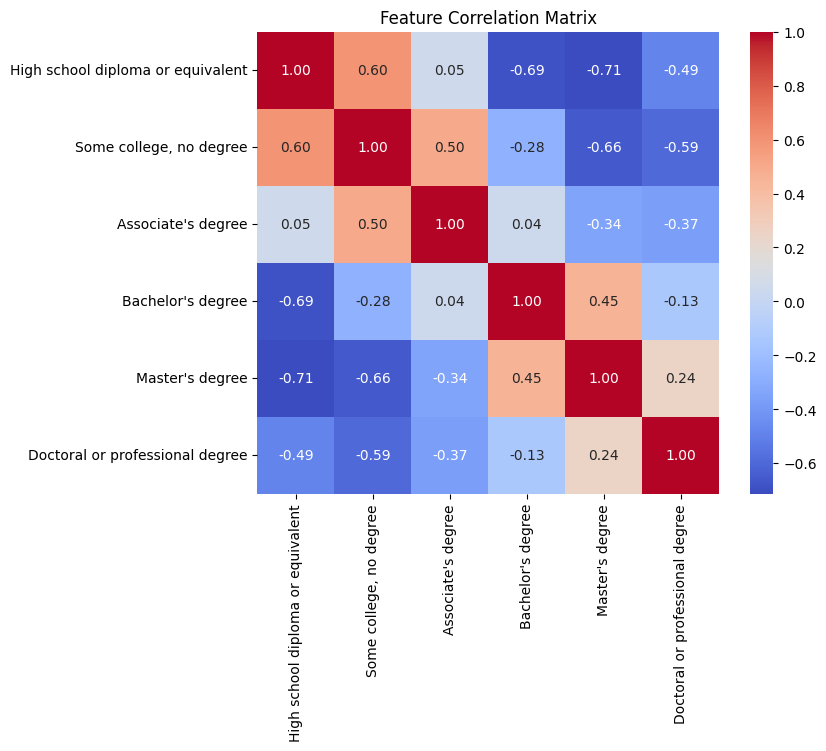

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [
    "High school diploma or equivalent", 
    "Some college, no degree", 
    "Associate's degree",
    "Bachelor's degree", 
    "Master's degree", 
    "Doctoral or professional degree"
]

correlation_matrix = education_53_1929[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Feature Correlation Matrix')
plt.show()

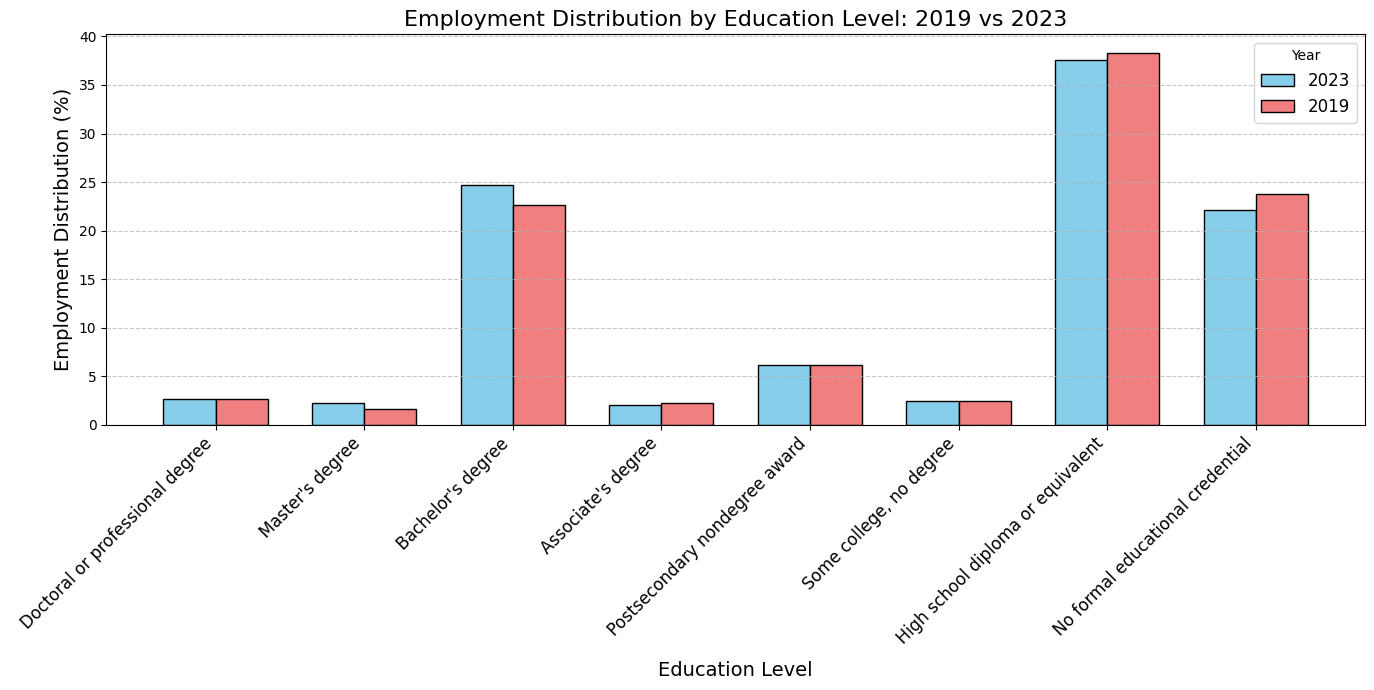

In [79]:
import numpy as np
# Data for 2023
labels_2023 = education_52_2333['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2023 = education_52_2333['Employment distribution, percent, 2023'][1:]

# Data for 2019
labels_2019 = education_52_1929['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2019 = education_52_1929['Employment distribution, percent, 2019'][1:]

# Ensure labels match for comparison
# assert list(labels_2023) == list(labels_2019), "Labels for 2019 and 2023 do not match!"

# Create positions for the bars
x = np.arange(len(labels_2023))  # Positions for groups
width = 0.35  # Width of each bar

# Plot the grouped bar chart
plt.figure(figsize=(14, 7))
plt.bar(x - width/2, values_2023, width, label='2023', color='skyblue', edgecolor='black')
plt.bar(x + width/2, values_2019, width, label='2019', color='lightcoral', edgecolor='black')

# Add labels, title, and legend
plt.title('Employment Distribution by Education Level: 2019 vs 2023', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Employment Distribution (%)', fontsize=14)
plt.xticks(x, labels_2023, rotation=45, ha='right', fontsize=12)
plt.legend(title="Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# **Analysis of Employment Distribution by Education Level: 2019 vs 2023**

### Key Observations:

1. **Dominance of High School Diploma or Equivalent**:
   - Both in 2019 and 2023, the **"High school diploma or equivalent"** category has the highest employment distribution percentage.
   - This indicates that a significant portion of the workforce requires at least a high school diploma, making it a critical baseline qualification.

2. **Stability Across Time**:
   - Employment distribution across most education levels appears relatively stable between 2019 and 2023.
   - Only minor changes are observed in the percentages for each category, suggesting consistency in workforce qualifications over time.

3. **Higher Education Levels (Bachelor's and Master's Degrees)**:
   - While higher education categories like **"Bachelor's degree"** and **"Master's degree"** show smaller percentages compared to high school diplomas, their share remains significant.
   - This reflects their importance for specialized or higher-paying roles in the workforce.


From this graph, we can see that the highest employment in 2019 was in the category of **"High school diploma or equivalent."** However, we cannot say for sure that a high school diploma or equivalent degree will always have the highest employment because, for higher degrees, the **minimum requirement** is often a high school diploma or equivalent.

We also need to analyze data from the **occupation perspective** to draw a more accurate conclusion. For instance, if the highest-paying job is that of a CEO, we need to examine the **minimum degree** a CEO typically holds.

From this graph, we can definitely say that to secure a good job, a person **needs at least a high school diploma or equivalent.**

The above two graphs shows the same data. We can have either one of them. 

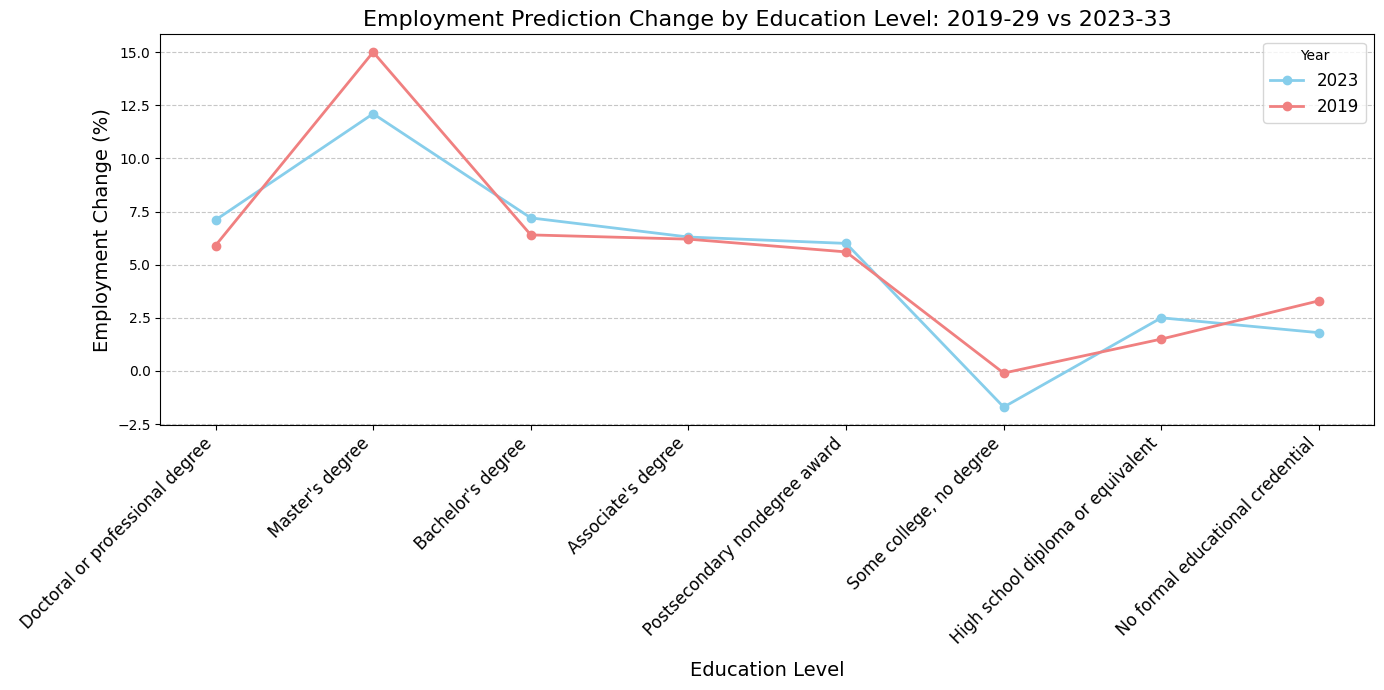

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Data for 2019
labels_2019 = education_52_1929['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2019 = education_52_1929['Employment change, percent, 2019-29'][1:]

# Data for 2023
labels_2023 = education_52_2333['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2023 = education_52_2333['Percent employment change, 2023-33'][1:]

# Ensure labels match for comparison
# assert list(labels_2023) == list(labels_2019), "Labels for 2019 and 2023 do not match!"

# Convert labels to positions for plotting
x = np.arange(len(labels_2023))  # Positions for each education level

# Plot the line graph
plt.figure(figsize=(14, 7))
plt.plot(x, values_2023, label='2023', marker='o', color='skyblue', linewidth=2)
plt.plot(x, values_2019, label='2019', marker='o', color='lightcoral', linewidth=2)

# Add labels, title, and legend
plt.title('Employment Prediction Change by Education Level: 2019-29 vs 2023-33', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Employment Change (%)', fontsize=14)
plt.xticks(x, labels_2023, rotation=45, ha='right', fontsize=12)
plt.legend(title="Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

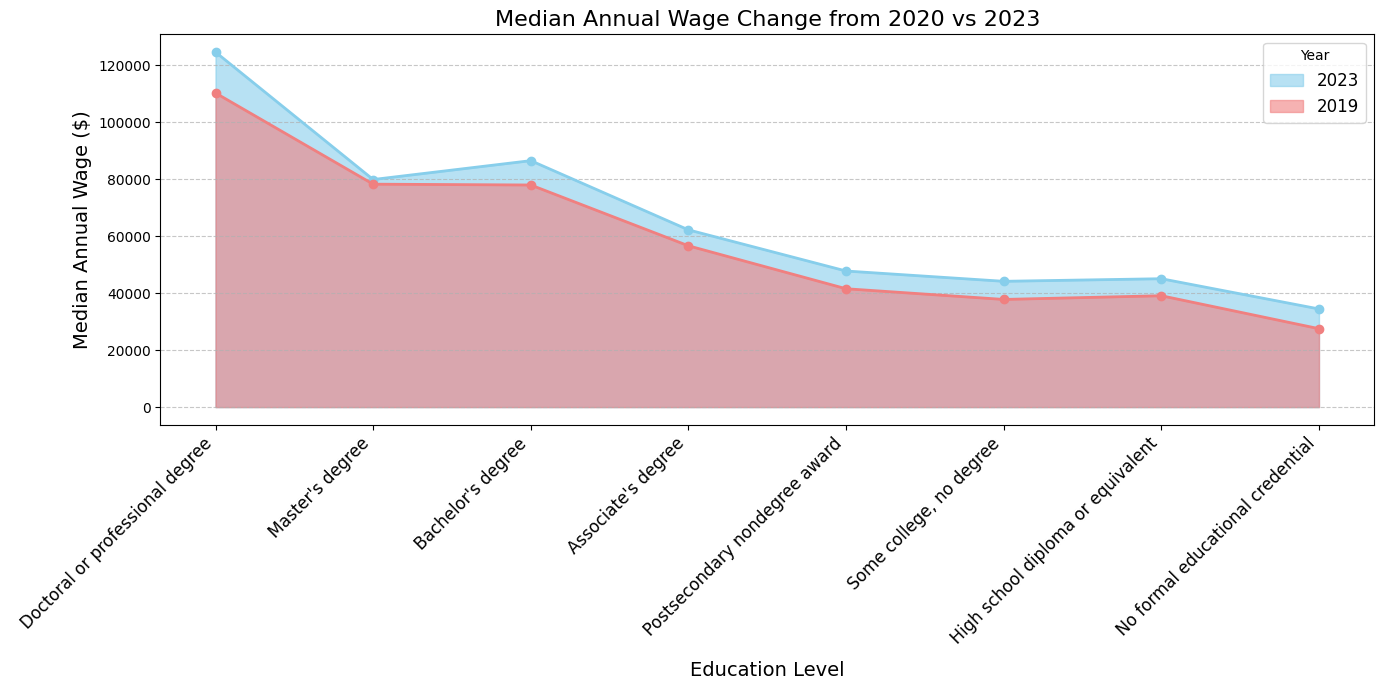

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Data for 2019
labels_2019 = education_52_1929['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2019 = education_52_1929['Median annual wage, 2020(1)'][1:]

# Data for 2023
labels_2023 = education_52_2333['Typical entry-level education'][1:]  # Exclude Total, All Occupations
values_2023 = education_52_2333['Median annual wage, dollars, 2023[1]'][1:]

# Ensure labels match for comparison
# assert list(labels_2023) == list(labels_2019), "Labels for 2019 and 2023 do not match!"

# Convert labels to positions for plotting
x = np.arange(len(labels_2023))  # Positions for each education level

# Plot the line graph
# Plot area chart
plt.figure(figsize=(14, 7))
plt.fill_between(x, values_2023, alpha=0.6, color='skyblue', label='2023')
plt.fill_between(x, values_2019, alpha=0.6, color='lightcoral', label='2019')
plt.plot(x, values_2023, marker='o', color='skyblue', linewidth=2)
plt.plot(x, values_2019, marker='o', color='lightcoral', linewidth=2)

# Add labels, title, and legend
plt.title('Median Annual Wage Change from 2020 vs 2023', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Median Annual Wage ($)', fontsize=14)
plt.xticks(x, labels_2023, rotation=45, ha='right', fontsize=12)
plt.legend(title="Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

- We are planning on creating a clusters or labeling on the Different Job occupation. 
  - Issues With it: 
    - Ex. We have manager and we use Cosine Similarity, it will put all the managers under one lable. 
    - 

In [82]:
import panel as pn
import matplotlib.pyplot as plt
import pandas as pd

# Enable Panel extensions
pn.extension()
# Convert the data to DataFrames
pre_covid_df = education_53_1929
post_covid_df = education_53_2333

# Education levels (columns to display)
education_levels = education_53_1929.columns[2:]
Occupation_53_1929 = education_53_1929['Title Labels'].unique().tolist()

Occupation_53_2333 = education_53_2333['Title Labels'].unique().tolist()
label_selector = pn.widgets.Select(   # create a Select widget
    name='Label',                     # name of the widget
    options= Occupation_53_1929   # options for users to select from
)

# I want to filter data based on the label_slector

Short_dataset = education_53_1929[education_53_1929['Title Labels'] == 'Management occupations']

label_selector_profession = pn.widgets.Select(   # create a Select widget
    name='Profession',                     # name of the widget
    options= Short_dataset['2019 National Employment Matrix title'].unique().tolist()   # options for users to select from
)

x_precovid_1929 = education_53_1929[education_53_1929['2019 National Employment Matrix title'] == label_selector_profession.value]
x_postcovid_2333 = education_53_2333[education_53_2333['2023 National Employment Matrix title'] == label_selector_profession.value]
x_precovid_1929
education_53_2333
x_precovid_1929


,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
1,Chief executives(1),11-1011,1.6,8.0,13.9,4.8,41.0,24.1,6.5,11,Management occupations


pre_covid_df = education_53_1929
post_covid_df = education_53_2333

# Education levels (columns to display)
education_levels = education_53_1929.columns[2:]
Occupation_53_1929 = education_53_1929['Title Labels'].unique()

Occupation_53_2333 = education_53_2333['Title Labels'].unique()
Occupation_53_2333

Data extraction Process: 
  - Pre covid and post covid
    - Dropdown 1: Get the Occupation. 
    - Dropdown 2: Use that Value to show the list of occupations from the 2019 National Employment Matrix title column
  - Y axis: Show the data from that perticular profession or row on Y axis
X axis: Education Levels
Y axis : Percentage Workers

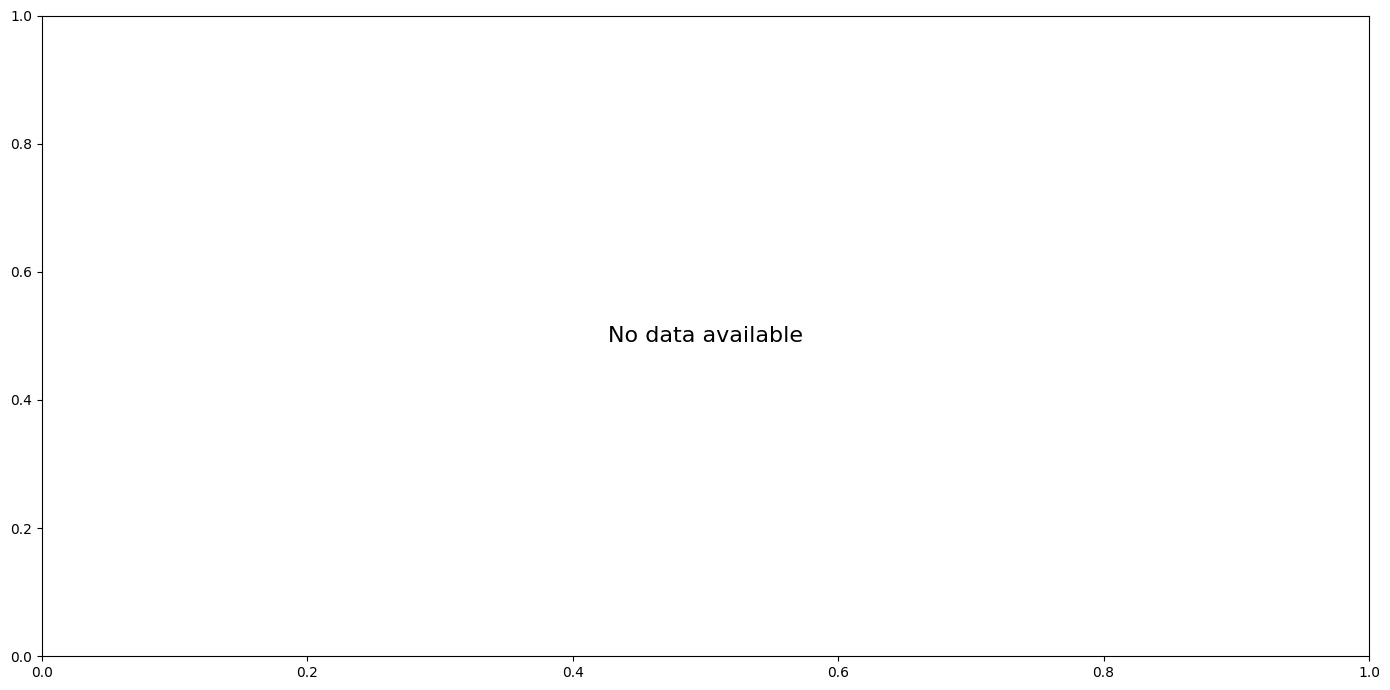

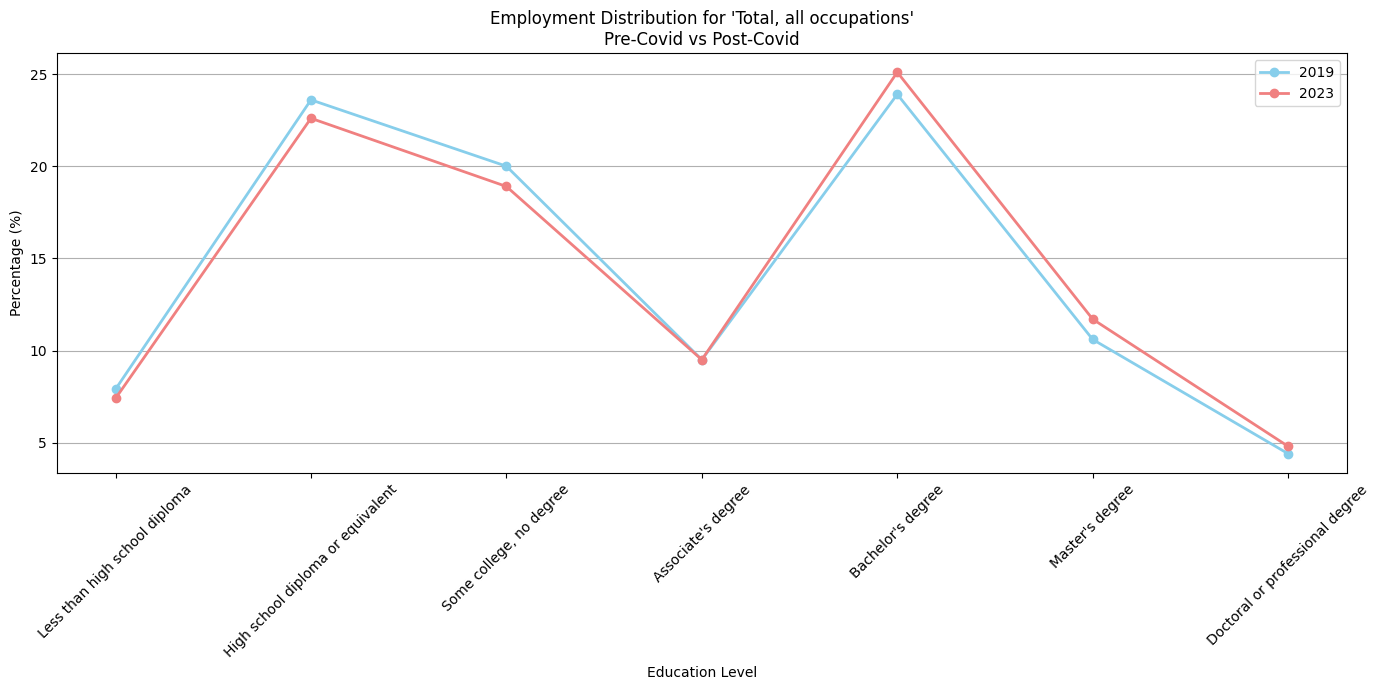

BokehModel(combine_events=True, render_bundle={'docs_json': {'23fa909c-88d0-40f7-9483-375826c08e39': {'version…

In [83]:
import panel as pn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Enable Panel extensions
pn.extension()

# Load your data
pre_covid_df = education_53_1929
post_covid_df = education_53_2333

# Define column names for education levels
education_levels = pre_covid_df.columns[2:9]

# Unique Title Labels
labels = pre_covid_df['Title Labels'].unique().tolist()

# Create widgets
label_selector = pn.widgets.Select(name='Label', options=labels, value=labels[0])
profession_selector = pn.widgets.Select(name='Profession', options=[])

# Update the profession options dynamically based on the selected label
@pn.depends(label_selector.param.value, watch=True)
def update_profession_selector(label):
    filtered_df = pre_covid_df[pre_covid_df['Title Labels'] == label]
    profession_options = filtered_df['2019 National Employment Matrix title'].unique().tolist()
    profession_selector.options = profession_options
    profession_selector.value = profession_options[0] if profession_options else None

# Plotting function
def plot(label, profession):
    plt.figure(figsize=(14, 7))

    # Filter data for the selected label and profession
    pre_covid_filtered = pre_covid_df[pre_covid_df['2019 National Employment Matrix title'] == profession]
    post_covid_filtered = post_covid_df[post_covid_df['2023 National Employment Matrix title'] == profession]

    if not pre_covid_filtered.empty and not post_covid_filtered.empty:
        pre_covid_values = pre_covid_filtered.iloc[0, 2:9].values.tolist()
        post_covid_values = post_covid_filtered.iloc[0, 2:9].values.tolist()

        # Plot data
        plt.plot(education_levels, pre_covid_values, label='2019', marker='o', color='skyblue', linewidth=2)
        plt.plot(education_levels, post_covid_values, label='2023', marker='o', color='lightcoral', linewidth=2)

        # Add labels, title, and legend
        plt.title(f"Employment Distribution for '{profession}'\nPre-Covid vs Post-Covid")
        plt.xlabel("Education Level")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(axis='y')
    else:
        plt.text(0.5, 0.5, "No data available", ha='center', va='center', fontsize=16)

    plt.tight_layout()
    plt.show()

# Bind the interactive plot
interactive_plot = pn.bind(plot, label_selector, profession_selector)

# Markdown explanation
explanation = pn.pane.Markdown("""
### Employment Distribution Analysis
Select a label and profession to see the comparison between Pre-Covid (2019) and Post-Covid (2023) employment distribution by education level.
""")

# Panel layout
app = pn.Row(
    pn.WidgetBox(label_selector, profession_selector, explanation),
    interactive_plot
)

# Update the profession selector initially
update_profession_selector(label_selector.value)

# Display the app in the notebook
app.servable()



In [ ]:
import pandas as pd

# Data for categories
data = {
    "2019 National Employment Matrix title": [
        "Total, all occupations",
        "Management occupations",
        "Business and financial operations occupations",
        "Computer and mathematical occupations",
        "Architecture and engineering occupations",
        "Life, physical, and social science occupations",
        "Community and social service occupations",
        "Legal occupations",
        "Educational instruction and library occupations",
        "Arts, design, entertainment, sports, and media occupations",
        "Healthcare practitioners and technical occupations",
        "Healthcare support occupations",
        "Protective service occupations",
        "Food preparation and serving related occupations",
        "Building and grounds cleaning and maintenance occupations",
        "Personal care and service occupations",
        "Sales and related occupations",
        "Office and administrative support occupations",
        "Farming, fishing, and forestry occupations",
        "Construction and extraction occupations",
        "Installation, maintenance, and repair occupations",
        "Production occupations",
        "Transportation and material moving occupations"
    ],
    "2019 National Employment Matrix code": [
        "00-0000", "11-0000", "13-0000", "15-0000", "17-0000", "19-0000", "21-0000", 
        "23-0000", "25-0000", "27-0000", "29-0000", "31-0000", "33-0000", "35-0000", 
        "37-0000", "39-0000", "41-0000", "43-0000", "45-0000", "47-0000", "49-0000", 
        "51-0000", "53-0000"
    ]
}

# Create the DataFrame
categories = pd.DataFrame(data)

# Display the DataFrame
categories


In [ ]:
# This data table is Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2019
# List indices are: 2019 National Employment Matrix title, 2019 National Employment Matrix code,
#high school diploma num, some college no degree num, associates degree num, bachelors degree num, masters degree num, doctorate num
processTable(table2)
print("\n")
asdsafsa


In [ ]:

# Function to process and extract relevant rows for a specific title
def extract_total_occupation_data(sheet):
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Look for the row with "Total, all occupations"
        if row_values[0] == "Total, all occupations":
            return row_values[2:]  # Return data starting from index 2 (excluding matrix code)

# Extracting data
total_occupation_data = extract_total_occupation_data(table2)

# Education levels corresponding to the data
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(education_levels, total_occupation_data, color='skyblue', edgecolor='black')
plt.title("Educational Attainment Distribution Percentage (Total, All Occupations, 2019)", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Percentage of Workers", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# This data table is Table 5.4 Education and training assignments by detailed occupation, 2019
processTable(table3)
print("\n")


Beginning of visualizations for table 5.4 data:


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Access Table 5.4 (Education and training data)
table_prepandemic = workbook["Table 5.4"]
table_postpandemic = workbook2["Table 5.4"]

# Function to process and extract data from Table 5.4
def extract_table_5_4_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=4, max_row=sheet.max_row, min_col=1, max_col=6):  # Adjust rows/columns as needed
        row_values = [cell.value for cell in row]
        # Skip empty or metadata rows
        if not row_values[0] or row_values[0].startswith("Table") or row_values[0] in ("Footnotes:", "(1)"):
            continue
        # Collect only meaningful rows
        data.append({
            "Occupation": row_values[0],
            "Education": row_values[2],  # Column C
            "Work Experience": row_values[3],  # Column D
            "On-the-Job Training": row_values[4],  # Column E
        })
    return pd.DataFrame(data)

# Extract data for pre- and post-pandemic
data_prepandemic = extract_table_5_4_data(table_prepandemic)
data_postpandemic = extract_table_5_4_data(table_postpandemic)

Graph 1: Distribution of Typical Education Needed for Entry (Pre-Pandemic)

In [ ]:
# Graph 1: Typical Education Needed for Entry
education_counts = Counter(data_prepandemic['Education'])

# Filter out None values from the keys
valid_education_keys = [key for key in education_counts.keys() if key is not None]
valid_education_values = [education_counts[key] for key in valid_education_keys]

plt.figure(figsize=(10, 6))
# Use the filtered keys and values for plotting
plt.bar(valid_education_keys, valid_education_values, color='skyblue', edgecolor='black')
plt.title('Distribution of Typical Education Needed for Entry (Pre-Pandemic)', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Graph 2: Required Work Experience in a Related Occupation

In [ ]:
# Graph 2: Work Experience in a Related Occupation
experience_counts = Counter(data_prepandemic['Work Experience'])

# Filter out None values from the keys
valid_experience_keys = [key for key in experience_counts.keys() if key is not None]
valid_experience_values = [experience_counts[key] for key in valid_experience_keys]


plt.figure(figsize=(10, 6))
# Use the filtered keys and values for plotting
plt.bar(valid_experience_keys, valid_experience_values, color='lightcoral', edgecolor='black')
plt.title('Distribution of Work Experience in Related Occupations (Pre-Pandemic)', fontsize=16)
plt.xlabel('Work Experience', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Graph 3: Typical On-the-Job Training Needed

In [ ]:
# Graph 3: Typical On-the-Job Training Needed
training_counts = Counter(data_prepandemic['On-the-Job Training'])

# Filter out None values from the keys
valid_training_keys = [key for key in training_counts.keys() if key is not None]
valid_training_values = [training_counts[key] for key in valid_training_keys]

# Plot the data for Typical On-the-Job Training
plt.figure(figsize=(10, 6))
plt.bar(valid_training_keys, valid_training_values, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Typical On-the-Job Training Needed (Pre-Pandemic)', fontsize=16)
plt.xlabel('On-the-Job Training', fontsize=14)
plt.ylabel('Number of Occupations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The cell below displays 7 charts - one for each education level from graph 1 combined with the data from graph 2 (the amount of work experince needed for an occupation)

In [ ]:
# Graphs for Data from both graphs 1 and 2

# Group data by education level
grouped_by_education = data_prepandemic.groupby('Education')

# Iterate over each education level and plot the distribution of work experience
for education_level, group in grouped_by_education:
    print("\n")
    # Count work experience categories for this education level
    work_experience_counts = Counter(group['Work Experience'])

    # Filter out None values
    valid_experience_keys = [key for key in work_experience_counts.keys() if key is not None]
    valid_experience_values = [work_experience_counts[key] for key in valid_experience_keys]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.bar(valid_experience_keys, valid_experience_values, color='lightblue', edgecolor='black')
    plt.title(f'Required Work Experience Distribution for a job that requires {education_level} (Pre-Pandemic)', fontsize=16)
    plt.xlabel('Work Experience Needed', fontsize=14)
    plt.ylabel('Number of Occupations', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
# -- POST PANDEMIC DATA --

# This data table is Table 5.2 Employment, wages, and projected change in employment by typical entry-level education (Employment in thousands)
# List indices are: Typical Entry level education, employment 2033, employment distribution % 2023, employment change % 2023-33, median annual wage
processTable(table1p)
print("\n")

In [ ]:
# This data table is Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2023
# List indices are: 2019 National Employment Matrix title, 2019 National Employment Matrix code,
#high school diploma num, some college no degree num, associates degree num, bachelors degree num, masters degree num, doctorate num
processTable(table2p)
print("\n")

In [ ]:
# This data table is Table 5.4 Education and training assignments by detailed occupation, 2023
processTable(table3p)
print("\n")